In [1]:
import numpy as np

In [75]:
def create_clustered_data(N, k):
    np.random.seed(10)
    points_per_cluster = float(N) / k
    X = []
    for i in range(k):
        income_centroid = np.random.uniform(20000.0, 500000.0)
        age_centroid = np.random.uniform(20.0, 70.0)
        for j in range(int(points_per_cluster)):
            X.append([np.random.normal(income_centroid, 10000.0), 
                      np.random.normal(age_centroid, 20.0)])
    X = np.array(X)
    return X

In [76]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
from sklearn.preprocessing import StandardScaler

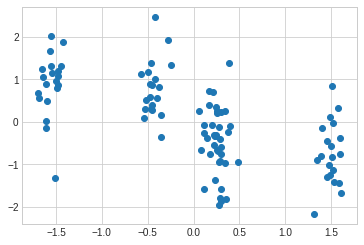

In [77]:
data = create_clustered_data(100, 5)
scaler = StandardScaler()
data = scaler.fit_transform(data)

plt.scatter(data[:, 0], data[:, 1]);

In [78]:
model = KMeans(5)
model.fit(data)

def plot_clusters(data, model):
    plt.figure(figsize=(10, 7))
    plt.scatter(data[:, 0], data[:, 1], c=model.labels_, edgecolor="k", cmap="hot")
    plt.show()

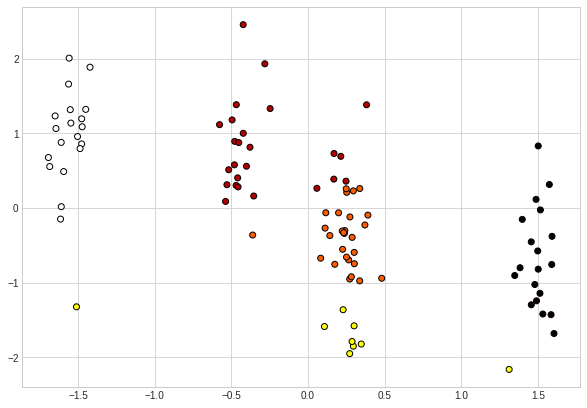

In [79]:
plot_clusters(data, model)

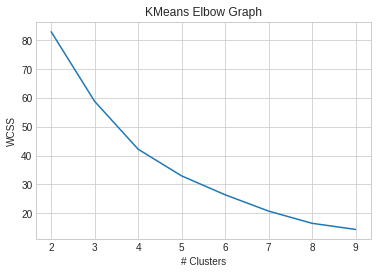

In [82]:
# finding the optimal number of clusters for our data
wcss = []

for i in range(2, 10):
    model = KMeans(i)
    model.fit(data)
    wcss.append(model.inertia_)

plt.plot(range(2, 10), wcss)
plt.title("KMeans Elbow Graph")
plt.xlabel("# Clusters")
plt.ylabel("WCSS")
plt.show()